### Notes:
* various steps :
  1. Loading raw data in excel format
        a) Raw data having the readings associated with a patient for every 10 minutes.
  2. Cleaning the raw data.
  3. Modelling
  4. Output
* We are using previous 10 minutes data and forcasting next 20 minutes. 
  Eg : * At 10.00 , we are taking readings from 9.50 to 10.00 and forcasting readings till 10.20.
       * It takes around 10 to 13 minutes for the entire process.
       * So we get the alarm corresponding to the reading of 10.20  at 10.13. (around 7 min earlier)

In [0]:
%run "./Param_File"

In [0]:
#from pyspark.sql import SparkSession
import pandas as pd

In [0]:
# To view the files in blobstorage
file=dbutils.fs.ls(landing)
print(file)

[FileInfo(path='dbfs:/mnt/events/landing/1HourLatest.csv', name='1HourLatest.csv', size=169436, modificationTime=1658839500000)]

In [0]:
# Data Loading
path = '/dbfs/'+landing+ '1HourLatest.csv'
rt  = pd.read_csv(path)
lastrecord=rt.tail()
rt.head()

Out[5]:

,Time,RelativeTimeMilliseconds,Clock,HR,STII,Pulse,SpO2,Perf,etCO2,imCO2,awRR,NBPSys,NBPDia,NBPMean,NBPPulse,NBPTimeRemaining,ARTSys,ARTDia,ARTMean,etDES,inDES,etISO,inISO,etSEV,inSEV,etN2O,inN2O,MAC,etO2,inO2,Temp,BIS,SQI,EMG,TidalVolume,MinuteVolume,RR,SetTidalVolume,SetRR,SetIERatio,SetPEEP,SetPAWmax,SetPAWmin,SetMechanicalVentilation,TidalVolumeExpSpiro,TidalVolumeInSpiro,MinuteVolumeExpSpiro,MinuteVolumeInSpiro,LungComplianceSpiro,AirwayResistanceSpiro,MaxInspiratoryPressureSpiro,ECG,Pleth,CO2,ART,EEG,AWP,AWF,AWV,AWPSpiro,AWFSpiro,AWVSpiro,NumPatientAlarms,NumTechnicalAlarms,Alarms1,Alarms2,Alarms3,id,TimeStamp
0,00:00:01_000,1000,17:33,55,NaN,55.0,100.0,0.4,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,98,98,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.23,0.40024,0.0,NaN,NaN,0.59069,11.56480,177.4,NaN,NaN,NaN,NaN,NaN,AGM ZERO RUNNING,NaN,NaN,0,2022-07-26T12:32:28.157Z
1,00:00:02_000,2000,17:33,55,NaN,54.0,100.0,0.4,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,98,98,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.11,0.42808,0.0,NaN,NaN,0.50781,11.84379,366.7,NaN,NaN,NaN,NaN,NaN,AGM ZERO RUNNING,NaN,NaN,0,2022-07-26T12:32:28.157Z
2,00:00:03_000,3000,17:33,55,NaN,54.0,100.0,0.3,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,98,98,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.22,0.48523,0.0,NaN,NaN,0.56683,11.40022,558.7,NaN,NaN,NaN,NaN,NaN,AGM ZERO RUNNING,NaN,NaN,1,2022-07-26T12:32:28.157Z
3,00:00:04_000,4000,17:33,55,NaN,49.0,100.0,0.3,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,98,98,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.07,0.50379,0.0,NaN,NaN,0.58594,11.78077,752.4,NaN,NaN,NaN,NaN,NaN,AGM ZERO RUNNING,NaN,NaN,1,2022-07-26T12:32:28.157Z
4,00:00:05_000,5000,17:33,55,NaN,44.0,100.0,0.2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,98,98,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.47668,0.0,NaN,NaN,0.54688,11.76913,947.4,NaN,NaN,NaN,NaN,NaN,AGM ZERO RUNNING,NaN,NaN,2,2022-07-26T12:32:28.157Z


In [0]:
df = rt[['HR']]

In [0]:
timestamps = pd.date_range(0 , periods=599, freq='10S')
df["Time"] = timestamps
df = df.set_index("Time")
df

<command-1894758731726955>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 df["Time"] = timestamps
Out[7]:

,HR
Time,
1970-01-01 00:00:00,55
1970-01-01 00:00:10,55
1970-01-01 00:00:20,55
1970-01-01 00:00:30,55
1970-01-01 00:00:40,55
...,...
1970-01-01 01:39:00,58
1970-01-01 01:39:10,57
1970-01-01 01:39:20,57


###Loading updated data to the Model---Forecasting

In [0]:
!pip install keras
!pip install tensorflow

Requirement already satisfied: keras in /databricks/python3/lib/python3.8/site-packages (2.9.0)
 WARNING: You are using pip version 21.0.1; however, version 22.2 is available.
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command. 
Requirement already satisfied: tensorflow in /databricks/python3/lib/python3.8/site-packages (2.9.1)
Requirement already satisfied: tensorboard<2.10,>=2.9 in /databricks/python3/lib/python3.8/site-packages (from tensorflow) (2.9.1)
Requirement already satisfied: gast<=0.4.0,>=0.2.1 in /databricks/python3/lib/python3.8/site-packages (from tensorflow) (0.4.0)
Requirement already satisfied: wrapt>=1.11.0 in /databricks/python3/lib/python3.8/site-packages (from tensorflow) (1.14.1)
Requirement already satisfied: setuptools in /usr/local/lib/python3.8/dist-packages (from tensorflow) (52.0.0)
Requirement already satisfied: astunparse>=1.6.0 in /databricks/python3/lib/python3.8/site-packages (from tensorflow) (1.6.3)
Requirement already satisfied: tensorflow-io-gcs-filesystem>=0.23.1 in /databricks/python3/lib/python3.8/site-packages (from tensorflow) (0.26.0)
Requirement already satisfied: libclang>=13.0.0 in /databricks/python3/lib/python3.8/site-packages (from tensorflow) (14.0.1)
Requirement already satisfied: protobuf<3.20,>=3.9.2 in /databricks/python3/lib/python3.8/site-packages (from tensorflow) (3.17.2)
Requirement already satisfied: opt-einsum>=2.3.2 in /databricks/python3/lib/python3.8/site-packages (from tensorflow) (3.3.0)
Requirement already satisfied: tensorflow-estimator<2.10.0,>=2.9.0rc0 in /databricks/python3/lib/python3.8/site-packages (from tensorflow) (2.9.0)
Requirement already satisfied: google-pasta>=0.1.1 in /databricks/python3/lib/python3.8/site-packages (from tensorflow) (0.2.0)
Requirement already satisfied: flatbuffers<2,>=1.12 in /databricks/python3/lib/python3.8/site-packages (from tensorflow) (1.12)
Requirement already satisfied: keras<2.10.0,>=2.9.0rc0 in /databricks/python3/lib/python3.8/site-packages (from tensorflow) (2.9.0)
Requirement already satisfied: termcolor>=1.1.0 in /databricks/python3/lib/python3.8/site-packages (from tensorflow) (1.1.0)
Requirement already satisfied: absl-py>=1.0.0 in /databricks/python3/lib/python3.8/site-packages (from tensorflow) (1.2.0)
Requirement already satisfied: six>=1.12.0 in /databricks/python3/lib/python3.8/site-packages (from tensorflow) (1.15.0)
Requirement already satisfied: keras-preprocessing>=1.1.1 in /databricks/python3/lib/python3.8/site-packages (from tensorflow) (1.1.2)
Requirement already satisfied: numpy>=1.20 in /databricks/python3/lib/python3.8/site-packages (from tensorflow) (1.20.1)
Requirement already satisfied: typing-extensions>=3.6.6 in /databricks/python3/lib/python3.8/site-packages (from tensorflow) (4.3.0)
Requirement already satisfied: packaging in /databricks/python3/lib/python3.8/site-packages (from tensorflow) (20.9)
Requirement already satisfied: grpcio<2.0,>=1.24.3 in /databricks/python3/lib/python3.8/site-packages (from tensorflow) (1.47.0)
Requirement already satisfied: h5py>=2.9.0 in /databricks/python3/lib/python3.8/site-packages (from tensorflow) (3.7.0)
Requirement already satisfied: wheel<1.0,>=0.23.0 in /databricks/python3/lib/python3.8/site-packages (from astunparse>=1.6.0->tensorflow) (0.36.2)
Requirement already satisfied: werkzeug>=1.0.1 in /databricks/python3/lib/python3.8/site-packages (from tensorboard<2.10,>=2.9->tensorflow) (2.2.0)
Requirement already satisfied: requests<3,>=2.21.0 in /databricks/python3/lib/python3.8/site-packages (from tensorboard<2.10,>=2.9->tensorflow) (2.25.1)
Requirement already satisfied: google-auth<3,>=1.6.3 in /databricks/python3/lib/python3.8/site-packages (from tensorboard<2.10,>=2.9->tensorflow) (2.9.1)
Requirement already satisfied: google-auth-oauthlib<0.5,>=0.4.1 in /databricks/python3/lib/python3.8/site-packages (from tensorboard<2.10,>=2.9->tensorflow) (0.4.6)
Requirem

In [0]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings ('ignore')

In [0]:
model = tf.keras.models.load_model('/dbfs/mnt/events/model/') #import model

In [0]:
data = df.values
model_input = []

In [0]:
scaler = MinMaxScaler()
scaler = scaler.fit(data)
data = scaler.transform(data)

In [0]:
for i in range(100, len(data)):
    inp = data[i-100:i]
    model_input.append(inp)                      #transforms input to required shape

In [0]:
model_input = np.array(model_input)

In [0]:
model_input.shape

Out[15]: (499, 100, 1)

In [0]:
pred = model.predict(model_input[0:1]).flatten()       #scaled prediction saved in 'pred'

1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 448ms/step

In [0]:
forecast = scaler.inverse_transform(pred.reshape(-1,1))        #20 min forecast (10 sec apart) after inverse transform

In [0]:
forecast

Out[18]: array([[58.462364],
 [58.55487 ],
 [58.50447 ],
 [58.533974],
 [58.56523 ],
 [58.498558],
 [58.604813],
 [58.55011 ],
 [58.515015],
 [58.569866],
 [58.480488],
 [58.493225],
 [58.512577],
 [58.514145],
 [58.57013 ],
 [58.522957],
 [58.49038 ],
 [58.559227],
 [58.485023],
 [58.49787 ],
 [58.458458],
 [58.547287],
 [58.54705 ],
 [58.526184],
 [58.485603],
 [58.493904],
 [58.54953 ],
 [58.572956],
 [58.51323 ],
 [58.48046 ],
 [58.57893 ],
 [58.53389 ],
 [58.508686],
 [58.559 ],
 [58.549187],
 [58.49588 ],
 [58.51075 ],
 [58.556454],
 [58.5716 ],
 [58.58554 ],
 [58.535625],
 [58.53235 ],
 [58.573685],
 [58.531372],
 [58.631256],
 [58.57846 ],
 [58.57524 ],
 [58.580917],
 [58.516106],
 [58.555435],
 [58.519493],
 [58.49733 ],
 [58.487373],
 [58.607704],
 [58.513885],
 [58.529472],
 [58.47184 ],
 [58.540947],
 [58.490814],
 [58.537773],
 [58.55309 ],
 [58.54165 ],
 [58.504223],
 [58.534676],
 [58.48178 ],
 [58.529953],
 [58.5298 ],
 [58.477264],
 [58.509262],
 [58.570457],
 [58.53898 ],
 [58.547836],
 [58.54193 ],
 [58.476433],
 [58.577133],
 [58.497787],
 [58.524525],
 [58.503525],
 [58.596024],
 [58.516586],
 [58.520622],
 [58.52603 ],
 [58.563194],
 [58.533363],
 [58.524597],
 [58.54354 ],
 [58.507416],
 [58.537872],
 [58.473778],
 [58.555916],
 [58.54339 ],
 [58.498775],
 [58.53343 ],
 [58.512074],
 [58.5002 ],
 [58.534767],
 [58.551292],
 [58.52243 ],
 [58.5817 ],
 [58.566086],
 [58.55243 ],
 [58.562965],
 [58.50821 ],
 [58.599472],
 [58.52208 ],
 [58.60009 ],
 [58.523155],
 [58.596382],
 [58.53293 ],
 [58.60798 ],
 [58.58305 ],
 [58.4787 ],
 [58.60077 ],
 [58.594494],
 [58.592728],
 [58.55938 ],
 [58.535484],
 [58.553764],
 [58.544327],
 [58.534046]], dtype=float32)

In [0]:
forecast = pd.DataFrame(forecast)
forecast.rename(columns = {0:'HR'}, inplace = True)

Out[20]:

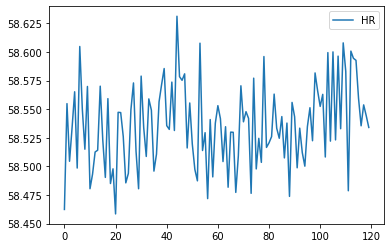

<AxesSubplot:>

In [0]:
forecast.plot()

In [0]:
forecastts = pd.date_range('1970-01-01 01:39:40' , periods=120, freq='10S')
forecastdf=pd.DataFrame()
forecastdf['Time']=forecastts
forecastdf['HR']=forecast['HR']
forecastdf

Out[21]:

,Time,HR
0,1970-01-01 01:39:40,58.462364
1,1970-01-01 01:39:50,58.554871
2,1970-01-01 01:40:00,58.504471
3,1970-01-01 01:40:10,58.533974
4,1970-01-01 01:40:20,58.565231
...,...,...
115,1970-01-01 01:58:50,58.559380
116,1970-01-01 01:59:00,58.535484
117,1970-01-01 01:59:10,58.553764
118,1970-01-01 01:59:20,58.544327


###Output part: comparing the mean of forecasted value with universal value, which predicts the status of HR

In [0]:
mean_last_20_min = forecastdf['HR'][len(forecastdf)-120:].mean()
mean_last_20_min

Out[22]: 58.535694

In [0]:
def strictly_increasing(L):
    return all(x<y for x, y in zip(L, L[1:]))

def strictly_decreasing(L):
    return all(x>y for x, y in zip(L, L[1:]))

def non_increasing(L):
    return all(x>=y for x, y in zip(L, L[1:]))

def non_decreasing(L):
    return all(x<=y for x, y in zip(L, L[1:]))

def monotonic(L):
    return non_increasing(L) or non_decreasing(L)

In [0]:
timeframe_batch = [df['HR'][-1]]
timeframe_batch

Out[24]: [57]

In [0]:
# Adding mean of forcasted (20 min) values
timeframe_batch.append(mean_last_20_min)
if len(timeframe_batch) > 4:
    timeframe_batch.pop(0)

In [0]:
timeframe_batch
new = timeframe_batch[-1]
old = timeframe_batch[-2]

In [0]:
roc = ((new - old)/old)*100
roc

Out[27]: 2.69420021458676

In [0]:
print(lastrecord)

Time RelativeTimeMilliseconds ... id TimeStamp
594 00:09:55_000 595000 ... 297 2022-07-26T12:43:46.448Z
595 00:09:56_000 596000 ... 297 2022-07-26T12:43:48.461Z
596 00:09:57_000 597000 ... 298 2022-07-26T12:43:48.461Z
597 00:09:58_000 598000 ... 298 2022-07-26T12:43:50.898Z
598 00:09:59_000 599000 ... 299 2022-07-26T12:43:50.898Z

[5 rows x 69 columns]

In [0]:
if timeframe_batch[-1] < 50:
    print("CRITICAL: Expecting a Low Heart Rate after 20 min")
elif timeframe_batch[-1] >150:
    print("CRITICAL: Expecting a High Heart Rate after 20 min")
else:
    if roc > 4:
        print("Expecting an INCREASE Heart Rate after 20 min")
    elif roc < -4:
        print("Expecting a DECREASE Heart Rate after 20 min")
    else:
        print("Expecting a Normal Heart Rate after 20 min")

Expecting a Normal Heart Rate after 20 min